In [1]:
import pandas as pd
import glob
import numpy as np
import os
import matplotlib.pyplot as plt

# Set working directory
os.chdir('/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/iterative_alternative/analyze_mecp2_cpg_enrichment')

# Serial


In [33]:
# Read the input file
df_serial = pd.read_csv('mecp2_cpg_enrichment/mecp2_cpg_enrichment.csv')
print(f"Total regions: {len(df_serial)}")


Total regions: 17017


In [34]:
np.sum(df_serial['significant'])

22

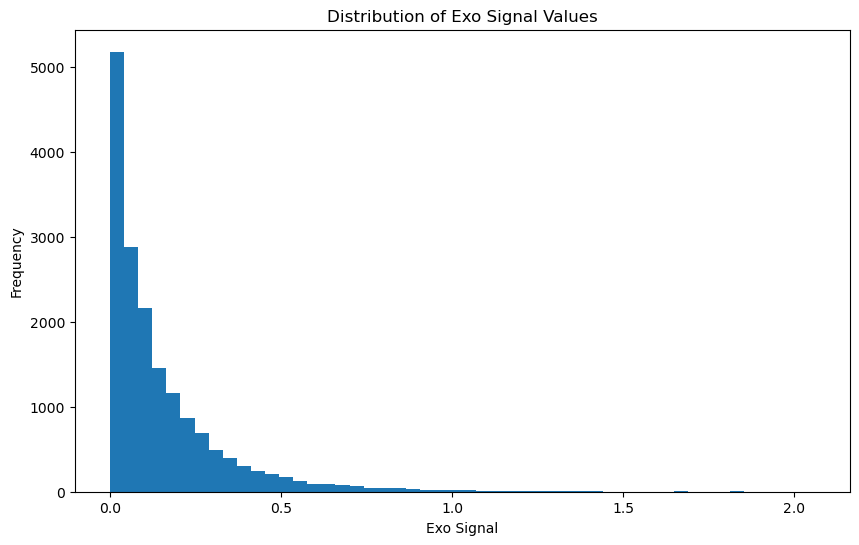

In [35]:
plt.figure(figsize=(10,6))
plt.hist(df_serial['exo_signal'], bins=50)
plt.xlabel('Exo Signal')
plt.ylabel('Frequency')
plt.title('Distribution of Exo Signal Values')
plt.show()

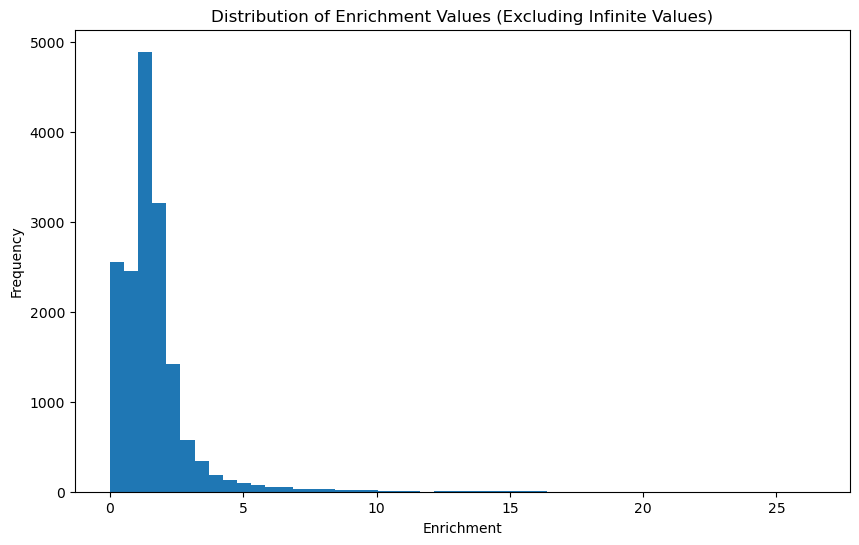

In [36]:
plt.figure(figsize=(10,6))
plt.hist(df_serial[df_serial['enrichment'] != float('inf')]['enrichment'], bins=50)
plt.xlabel('Enrichment')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Values (Excluding Infinite Values)')
plt.show()

In [37]:
df_serial.loc[df_serial['enrichment'] == float('inf'), 'enrichment'] = 10

In [38]:
df_serial = df_serial[df_serial['exo_signal'] > 0.1]

In [39]:
df_serial.head()

,chr,start,end,exo_signal,endo_signal,enrichment,significant
2,chr1,3671654,3672156,0.218376,0.179650,1.215567,False
7,chr1,4785376,4785814,0.354838,0.278872,1.272405,False
9,chr1,4857465,4858372,0.639017,0.300304,2.127902,False
10,chr1,5018557,5019711,0.158385,0.067396,2.350067,False
11,chr1,5083039,5083536,0.164911,0.156959,1.050664,False


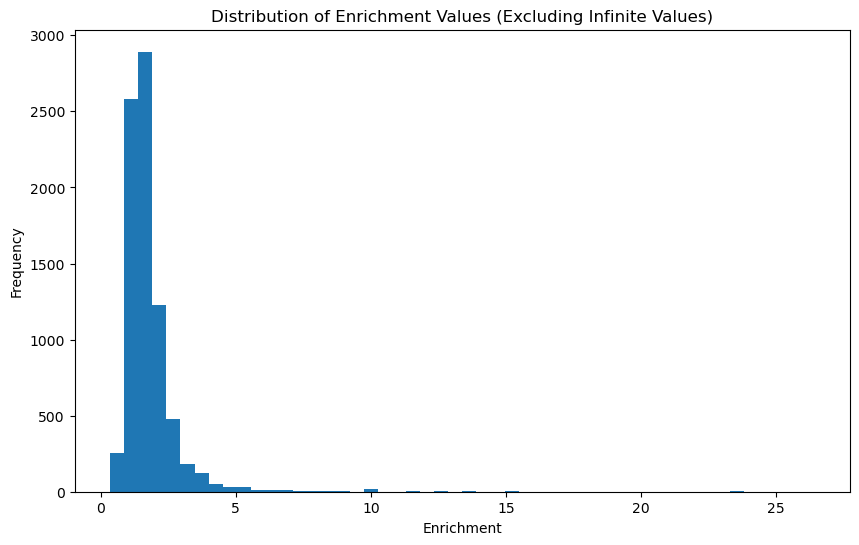

In [40]:
plt.figure(figsize=(10,6))
plt.hist(df_serial[df_serial['enrichment'] != float('inf')]['enrichment'], bins=50)
plt.xlabel('Enrichment')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Values (Excluding Infinite Values)')
plt.show()

In [41]:
df_serial = df_serial.sort_values('enrichment', ascending=False)

In [42]:
df_serial.head()

,chr,start,end,exo_signal,endo_signal,enrichment,significant
11012,chr5,35525417,35525676,0.104553,0.003956,26.427297,False
9691,chr3,158561302,158562304,0.121210,0.004870,24.891312,False
12299,chr6,91212723,91212972,0.105519,0.004268,24.723086,False
13530,chr7,121734241,121735053,0.158421,0.006519,24.302147,False
268,chr1,72824693,72824937,0.186296,0.007881,23.639277,False


# Parallel


In [4]:
# Load differential expression analysis results
dea_neu = pd.read_csv('../../DATA/DEA_NEU.csv')
print(dea_neu.shape)
dea_neu.head()

(12945, 7)


,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,H2afy2,898.006083,-0.000002,0.096164,-0.000017,0.999986,0.999986
1,Lurap1l,248.853019,0.000021,0.175418,0.000119,0.999905,0.999970
2,Tcea1,1680.603269,0.000090,0.088197,0.001019,0.999187,0.999963
3,Igdcc4,872.289717,0.000126,0.100337,0.001255,0.998999,0.999963
4,Kdm6a,792.508606,-0.000035,0.108607,-0.000325,0.999741,0.999963


In [5]:
dea_neu = dea_neu[dea_neu['padj'] < 0.05]
dea_neu.shape

(2115, 7)

In [6]:
expression_threshold = dea_neu['baseMean'].quantile(0.02)
print(expression_threshold)

83.6236023872


In [7]:
dea_neu = dea_neu[dea_neu['baseMean'] > expression_threshold]
dea_neu.shape

(2072, 7)

In [8]:
dea_neu.to_csv('/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/iterative_alternative/analyze_mecp2_cpg_enrichment/integrated/DEA_NEU_filtered.csv', index=False)

In [9]:
# Read CpG islands bed file with tab separator and proper column names
cpg_islands = pd.read_csv('../../DATA/cpg_islands.bed', sep='\t', 
                         names=['chr', 'start', 'end', 'id', 'cpg_label', 'cpg_count'])

# Remove the "CpG:" prefix from cpg_label column
cpg_islands['cpg_label'] = cpg_islands['cpg_label'].str.replace('CpG:', '')

print(cpg_islands.shape)
cpg_islands.head()

(17017, 6)


,chr,start,end,id,cpg_label,cpg_count
0,chr1,3531624,3531843,611,,27
1,chr1,3670619,3671074,613,,34
2,chr1,3671654,3672156,613,,45
3,chr1,4491701,4493673,619,,165
4,chr1,4496947,4497608,619,,47


In [10]:
# Get list of all chunk files
chunk_files = glob.glob('mecp2_cpg_enrichment_parallel/chunk_*.csv')
chunk_files

['mecp2_cpg_enrichment_parallel/chunk_1.csv',
 'mecp2_cpg_enrichment_parallel/chunk_7.csv',
 'mecp2_cpg_enrichment_parallel/chunk_6.csv',
 'mecp2_cpg_enrichment_parallel/chunk_4.csv',
 'mecp2_cpg_enrichment_parallel/chunk_8.csv',
 'mecp2_cpg_enrichment_parallel/chunk_2.csv',
 'mecp2_cpg_enrichment_parallel/chunk_5.csv',
 'mecp2_cpg_enrichment_parallel/chunk_0.csv',
 'mecp2_cpg_enrichment_parallel/chunk_3.csv',
 'mecp2_cpg_enrichment_parallel/chunk_9.csv']

In [11]:
# Read and concatenate all chunks
df_parallel = pd.concat([pd.read_csv(f) for f in chunk_files], ignore_index=True)

# Sort by chromosome and start position
df_parallel = df_parallel.sort_values(['chr', 'start'])

print(f"Total regions analyzed: {len(df_parallel)}")

Total regions analyzed: 15032


In [12]:
df_parallel.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,peak_width_exo,peak_width_endo,significant
11198,chr1,3531624,3531843,0.000000,17.214411,0.000000,1.000000,endo_only,0.000000,416.0,False
11199,chr1,3670619,3671074,21.441080,119.642541,0.179210,0.060298,both,462.666667,1554.0,False
11200,chr1,3671654,3672156,114.589139,119.642541,0.957762,0.060298,both,671.333333,1554.0,False
11201,chr1,4496947,4497608,10.886892,20.508762,0.530841,1.000000,both,551.000000,393.0,False
11202,chr1,4571641,4572075,36.039438,12.499547,2.883260,0.353367,both,382.750000,345.0,False


In [13]:
df_parallel = df_parallel[df_parallel['chr'].isin([f'chr{i}' for i in range(1,20)] + ['chrX', 'chrY'])]
df_parallel.shape

(15028, 11)

In [14]:
df_parallel['significant'] = True

In [15]:
df_parallel.to_csv('mecp2_cpg_enrichment_parallel/mecp2_cpg_enrichment_parallel.csv', index=False)

In [16]:
# df_parallel = df_parallel[(df_parallel['exo_signal'] > 4.0) | (df_parallel['endo_signal'] > 4.0)]

In [17]:
df_both = df_parallel[df_parallel['binding_type'] == "both"]
df_both.shape

(13209, 11)

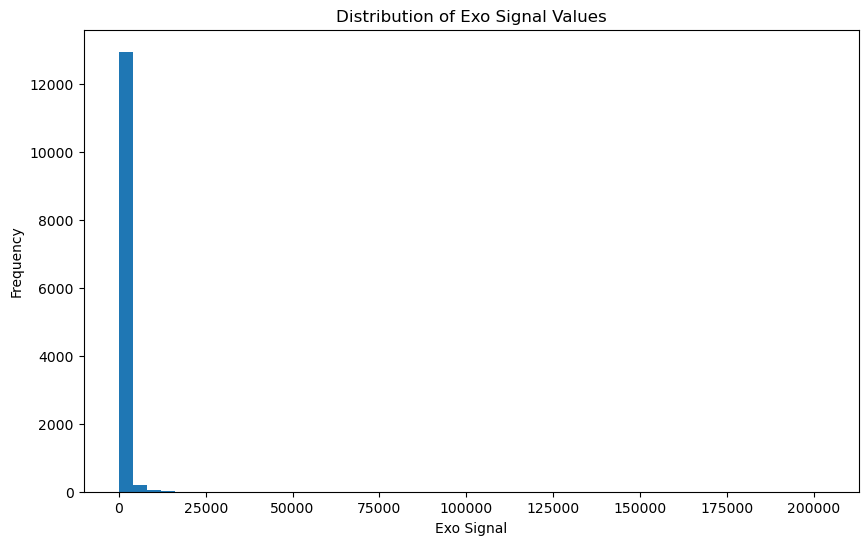

In [18]:
plt.figure(figsize=(10,6))
plt.hist(df_both['exo_signal'], bins=50)
plt.xlabel('Exo Signal')
plt.ylabel('Frequency')
plt.title('Distribution of Exo Signal Values')
plt.show()

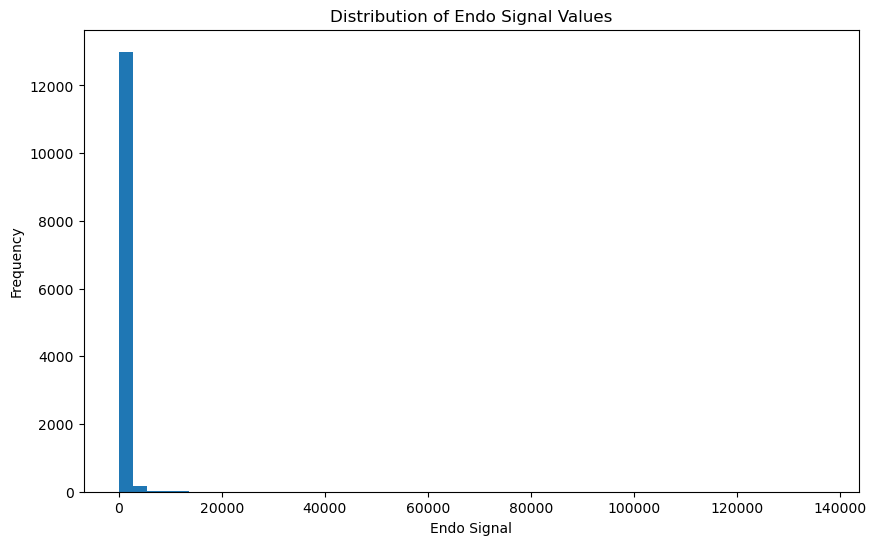

In [19]:
plt.figure(figsize=(10,6))
plt.hist(df_both['endo_signal'], bins=50)
plt.xlabel('Endo Signal')
plt.ylabel('Frequency')
plt.title('Distribution of Endo Signal Values')
plt.show()

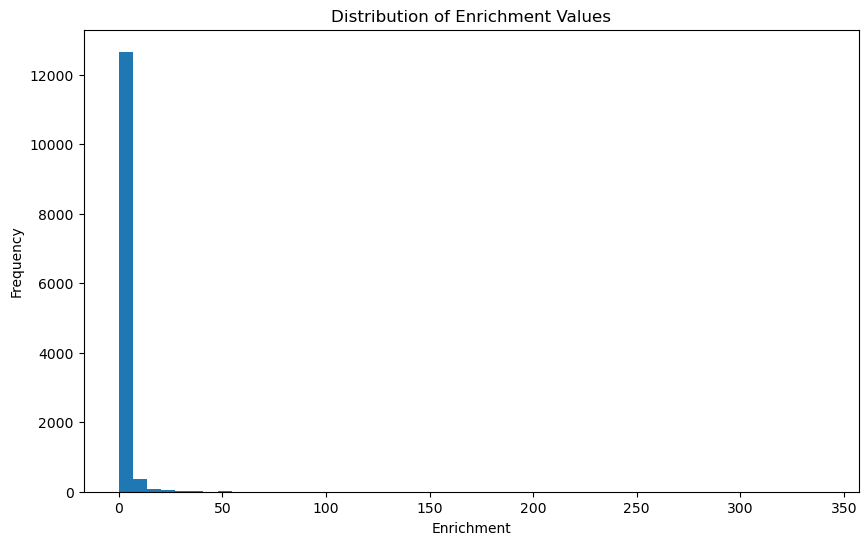

In [20]:
plt.figure(figsize=(10,6))
plt.hist(df_both['enrichment'], bins=50)
plt.xlabel('Enrichment')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Values')
plt.show()

In [21]:
df_both = df_both.sort_values('enrichment', ascending=False)
df_both.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,peak_width_exo,peak_width_endo,significant
3130,chr7,123369426,123369630,2976.203129,8.750610,340.113789,0.039143,both,1106.200000,433.0,True
14571,chr9,119339620,119340000,1647.147421,13.874465,118.717907,0.039143,both,1054.400000,441.0,True
944,chr11,103117220,103117987,1387.366007,15.728703,88.206001,0.027168,both,996.400000,436.0,True
10408,chr3,93555092,93555367,362.668182,4.184631,86.666707,0.039143,both,1041.000000,264.0,True
9249,chr14,118611620,118611930,731.500263,8.522529,85.831356,0.034350,both,1171.166667,369.0,True


In [22]:
df_both.head()

,chr,start,end,exo_signal,endo_signal,enrichment,pvalue,binding_type,peak_width_exo,peak_width_endo,significant
3130,chr7,123369426,123369630,2976.203129,8.750610,340.113789,0.039143,both,1106.200000,433.0,True
14571,chr9,119339620,119340000,1647.147421,13.874465,118.717907,0.039143,both,1054.400000,441.0,True
944,chr11,103117220,103117987,1387.366007,15.728703,88.206001,0.027168,both,996.400000,436.0,True
10408,chr3,93555092,93555367,362.668182,4.184631,86.666707,0.039143,both,1041.000000,264.0,True
9249,chr14,118611620,118611930,731.500263,8.522529,85.831356,0.034350,both,1171.166667,369.0,True


In [23]:
df_both.to_csv('mecp2_cpg_enrichment_parallel/mecp2_cpg_enrichment_both.csv', index=False)

# Integrate

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the integrated results
results_dir = "integrated/"
df = pd.read_csv(f"{results_dir}/mecp2_enriched_genes.csv")

In [26]:
print(df.shape)
df.head()

(12004, 12)


,gene,chr,cpg_start,cpg_end,mecp2_enrichment,exo_signal,endo_signal,binding_type,distance_to_gene,baseMean,log2FoldChange,padj
0,0610009B22Rik,chr11,51688626,51689166,0.927207,2775.264257,2993.145475,both,292,NaN,NaN,NaN
1,0610010F05Rik,chr11,23633135,23633766,2.544609,633.626135,249.007293,both,127,NaN,NaN,NaN
2,0610010K14Rik,chr11,70237525,70238413,1.138274,432.391788,379.866033,both,499,NaN,NaN,NaN
3,0610011F06Rik,chr17,25875044,25875794,1.247181,675.105061,541.304633,both,420,NaN,NaN,NaN
4,0610012G03Rik,chr16,31948044,31948757,2.163532,77.034992,35.606118,both,263,1483.241219,0.327138,0.018344


In [27]:
df = df[df['baseMean'].isna() == False]
print(df.shape)
df.head()

(1553, 12)


,gene,chr,cpg_start,cpg_end,mecp2_enrichment,exo_signal,endo_signal,binding_type,distance_to_gene,baseMean,log2FoldChange,padj
4,0610012G03Rik,chr16,31948044,31948757,2.163532,77.034992,35.606118,both,263,1483.241219,0.327138,0.018344
14,1110008P14Rik,chr2,32381502,32382189,0.871850,156.051024,178.988456,both,251,1256.617818,0.326418,0.010881
22,1110065P20Rik,chr4,124850233,124851474,0.532049,96.266398,180.935138,both,278,716.898761,0.496807,0.001177
62,1700025G04Rik,chr1,152089616,152090328,1.892529,359.393629,189.901261,both,203,2187.147601,-0.277303,0.013851
101,1810010H24Rik,chr11,107027745,107028594,0.513738,152.056720,295.981148,both,1849,255.436932,0.930793,0.000047


In [28]:
df.binding_type.value_counts()

binding_type
both        1486
exo_only      67
Name: count, dtype: int64

In [29]:
df = df[df['binding_type'] == 'both']

In [30]:
# Define gene categories based on RNA-seq data
def categorize_gene(row, fc_threshold=0.5, padj_threshold=0.05):
    if pd.isna(row['log2FoldChange']) or pd.isna(row['padj']):
        return 'non-deregulated'
    elif row['padj'] > padj_threshold:
        return 'non-deregulated'
    elif row['log2FoldChange'] >= fc_threshold:
        return 'up-regulated'
    elif row['log2FoldChange'] <= -fc_threshold:
        return 'down-regulated'
    else:
        return 'non-deregulated'

In [31]:
# Add category column
df['category'] = df.apply(categorize_gene, axis=1)


In [32]:
df['category'].value_counts()

category
non-deregulated    1156
down-regulated      207
up-regulated        123
Name: count, dtype: int64

In [33]:
# Create the density plot
plt.figure(figsize=(12, 8))

# Plot density for each category
for category, color in zip(['non-deregulated', 'up-regulated', 'down-regulated'], 
                         ['blue', 'orange', 'green']):
    subset = df[df['category'] == category]
    if len(subset) > 0:
        sns.kdeplot(data=subset['mecp2_enrichment'], 
                   label=category,
                   color=color)

plt.title('Mecp2 Enrichment Distribution by Gene Category')
plt.xlabel('Enrichment (Exo/Endo)')
plt.ylabel('Density')
plt.xlim(0, 8)  
plt.ylim(0, 1.2)
plt.legend()

# Add some statistics
for category in ['non-deregulated', 'up-regulated', 'down-regulated']:
    subset = df[df['category'] == category]
    print(f"\n{category}:")
    print(f"Number of genes: {len(subset)}")
    print(f"Mean enrichment: {subset['mecp2_enrichment'].mean():.2f}")
    print(f"Median enrichment: {subset['mecp2_enrichment'].median():.2f}")

# Save the plot
plt.savefig(f"{results_dir}/mecp2_enrichment_by_expression.pdf", 
            bbox_inches='tight', dpi=300)
plt.close()


non-deregulated:
Number of genes: 1156
Mean enrichment: 2.30
Median enrichment: 1.69

up-regulated:
Number of genes: 123
Mean enrichment: 2.22
Median enrichment: 1.74

down-regulated:
Number of genes: 207
Mean enrichment: 2.37
Median enrichment: 1.54
